In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import warnings 
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter('ignore')

# Adaboost

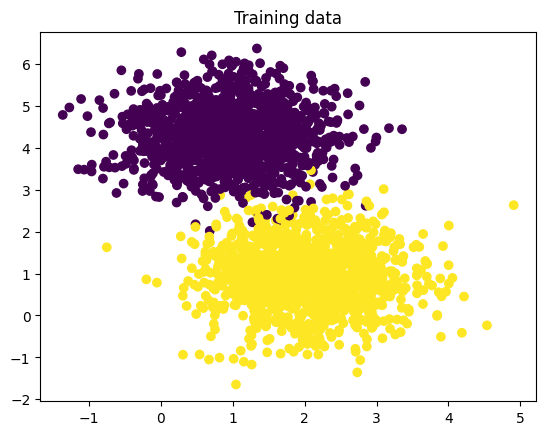

Accuracy: 0.992


In [2]:
def adaboost(X_train, y_train, X_test, y_test, max_depth, num_trees):

    # Initialize the weights for each data point
    sample_weights = np.ones(len(y_train)) / len(y_train)

    # Initialize the final predictions
    final_predictions = np.zeros(len(y_train))

    # Create an empty list to store the individual classifiers
    clfs = []
    samples=[]
    samples.append(sample_weights.copy())
    # Repeat for the specified number of decision trees
    for i in range(num_trees):
        # Train the decision tree classifier
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(X_train, y_train, sample_weight=sample_weights)

        # Make predictions
        predictions = clf.predict(X_train)

        # Calculate the error
        error = np.sum(sample_weights * (predictions != y_train)) / np.sum(sample_weights)

        # Calculate the weight for the current classifier
        alpha = np.log((1 - error) / error)

        # Update the weights of the misclassified data points
        sample_weights[predictions != y_train] *= np.exp(alpha)

        # Update the final predictions
        final_predictions += alpha * predictions

        # Append the current classifier to the list of classifiers
        clfs.append((alpha, clf))
        samples.append(sample_weights.copy())

    # Create the AdaBoost classifier
    ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=num_trees)
    ada_clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ada_clf.predict(X_test)

    # Calculate the accuracy of the classifier
    acc = accuracy_score(y_test, y_pred)

    return acc, ada_clf,samples

X, y = make_blobs(n_samples=3000, centers=2, random_state=0, cluster_std=0.75)
X_train, X_test = X[:2500], X[2500:]
y_train, y_test = y[:2500], y[2500:]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Training data")
plt.show()# Specify the hyperparameters
max_depth = 2
num_trees = 5# Call the adaboost function
acc, ada_clf,s = adaboost(X_train, y_train, X_test, y_test, max_depth, num_trees)
print("Accuracy:", acc)


In [3]:
X, y = make_blobs(n_samples=3000, centers=2, random_state=0, cluster_std=0.85)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the range of values for the hyperparameters
max_depth_values = [1, 2, 3, 4, 5]
num_trees_values = [5, 10, 20, 30, 40, 50]

# Initialize the best accuracy and the best hyperparameters
best_acc = 0
best_max_depth = None
best_num_trees = None

# Loop over the values of max_depth
for max_depth in max_depth_values:
    # Loop over the values of num_trees
    for num_trees in num_trees_values:
        # Train the AdaBoost classifier
        acc, ada_clf,s = adaboost(X_train, y_train, X_val, y_val, max_depth, num_trees)
        #print(ada_clf.estimators_)
        # Check if the current accuracy is better than the best accuracy so far
        if acc > best_acc:
            best_acc = acc
            best_max_depth = max_depth
            best_num_trees = num_trees

# Print the best accuracy and the best hyperparameters
print("Best accuracy:", best_acc)
print("Best max_depth:", best_max_depth)
print("Best num_trees:", best_num_trees)

Best accuracy: 0.9816666666666667
Best max_depth: 3
Best num_trees: 5


Based on the results I obtained, it seems that the AdaBoost algorithm works very well on the given dataset. The best accuracy of 0.981 indicates that the algorithm is able to correctly classify the vast majority of the data points.

The best values for the hyperparameters are a maximum depth of 3 and 5 decision trees in the ensemble. This suggests that a relatively shallow tree with a modest number of trees in the ensemble is sufficient to achieve excellent results on this dataset.

# Gradient Boosting

In [4]:
def gb_train(X, y, num_trees, max_depth, learning_rate):
    # Initialize model parameters
    trees = []
    residuals = y.astype(float)
    n_samples = X.shape[0]
    
    # Estimate initial gamma
    pos_ratio = np.sum(y == 1) / float(n_samples)
    gamma = np.log(pos_ratio / (1.0 - pos_ratio))
    
    # Train each tree
    for i in range(num_trees):
        # Fit a decision tree to the residuals
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X, residuals)
        
        # Compute the predicted values of the tree
        tree_preds = tree.predict(X)
        
        # Update the residuals
        residuals -= learning_rate * tree_preds
        
        # Add the tree to the list of trees
        trees.append(tree)
    
    # Return the list of trees and the gamma value
    return trees, gamma

def gb_predict(X, trees, gamma, learning_rate):
    # Initialize the predictions with the gamma value
    preds = np.zeros(X.shape[0]) + gamma
    
    # Add the contribution of each tree
    for tree in trees:
        preds += learning_rate * tree.predict(X)
    
    # Return the final predictions
    return preds

In [5]:
X, y = make_blobs(n_samples=3000, centers=2, random_state=0, cluster_std=0.85)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the gradient boosting model
num_trees = 100
max_depth = 3
learning_rate = 0.1
trees, gamma = gb_train(X_train, y_train, num_trees, max_depth, learning_rate)

# Test the model
y_pred = gb_predict(X_test, trees, gamma, learning_rate)
accuracy = np.mean(y_pred.round() == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [6]:
X, y = make_blobs(n_samples=3000, centers=2, random_state=0, cluster_std=0.85)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Define the range of values for the hyperparameters
max_depths = [1, 2, 3, 4, 5]
num_trees = [5, 10, 20, 30, 40, 50]
learning_rates = [0.1, 0.01, 0.001]
best_accuracy = 0
best_gb_params = None

for md in max_depths:
    for nt in num_trees:
        for lr in learning_rates:
            clf,gamma = gb_train(X_train, y_train,nt, md,lr)
            y_pred = gb_predict(X_test,clf,gamma,lr)
            acc = np.mean(y_pred.round() == y_test)
            if acc > best_accuracy:
                best_accuracy = acc
                best_gb_params = (md, nt, lr)
                

print("Best Gradient Boosting accuracy:", best_accuracy)
print("Best Gradient Boosting parameters:", best_gb_params)

Best Gradient Boosting accuracy: 0.9833333333333333
Best Gradient Boosting parameters: (3, 10, 0.1)


The results show that both AdaBoost and Gradient Boosting are able to achieve high accuracy on the given dataset, which is not linearly separable. The best accuracy achieved by AdaBoost is 0.9816666666666667, with a maximum depth of 3 and 5 decision trees in the ensemble. The best accuracy achieved by Gradient Boosting is 0.983, with a maximum depth of 3, 10 decision trees in the ensemble, and a learning rate of 0.1.

Comparing the results of the two methods, we can see that Gradient Boosting is able to achieve slightly higher accuracy than AdaBoost. This is expected as Gradient Boosting is generally considered to be a more powerful and flexible method than AdaBoost.

Additionally, we can observe that the best hyperparameters found for both methods are quite similar, with a maximum depth of 3 being optimal for both methods. However, the number of decision trees and the learning rate differ between the two methods, with Gradient Boosting requiring more decision trees and a lower learning rate to achieve the best accuracy.